In [1]:
import numpy as np 
import pandas as pd

In [2]:
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'plotly'

In [4]:
!pip install plotly==4.14.3

You should consider upgrading via the 'c:\users\nani\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [5]:
!pip install "notebook>=5.3" "ipywidgets>=7.5"

You should consider upgrading via the 'c:\users\nani\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [6]:
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
tv_shows = pd.read_csv('tv_shows.csv')
tv_shows.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [8]:
#dropping the duplicate values based on the title of the shows


tv_shows.drop_duplicates(subset='Title',
                         keep='first',inplace=True)

In [9]:
tv_shows.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [10]:
tv_shows['Rotten Tomatoes'] = tv_shows['Rotten Tomatoes'].fillna('0%')

In [11]:
tv_shows['Rotten Tomatoes'] = tv_shows['Rotten Tomatoes'].apply(lambda x : x.rstrip('%'))

In [12]:
tv_shows['Rotten Tomatoes'] = pd.to_numeric(tv_shows['Rotten Tomatoes'])

In [13]:
tv_shows['IMDb'] = tv_shows['IMDb'].fillna(0)

In [14]:
tv_shows['IMDb'] = tv_shows['IMDb']*10

In [15]:
tv_shows['IMDb'] = tv_shows['IMDb'].astype('int')

In [18]:
tv_shows_long=pd.melt(tv_shows[['Title','Netflix','Hulu','Disney+',
                                'Prime Video']],id_vars=['Title'],
                      var_name='StreamingOn', value_name='Present')

In [19]:
tv_shows_long = tv_shows_long[tv_shows_long['Present'] == 1]

In [20]:
tv_shows_long.drop(columns=['Present'],inplace=True)

In [21]:
tv_shows_long 

,Title,StreamingOn
0,Breaking Bad,Netflix
1,Stranger Things,Netflix
2,Money Heist,Netflix
3,Sherlock,Netflix
4,Better Call Saul,Netflix
...,...,...
22097,Sawyer Sessions,Prime Video
22098,Pinkfong! Dinosaur Songs,Prime Video
22099,How To Self-Publish,Prime Video
22100,BigDo2 - Random Hair,Prime Video


In [25]:
 tv_shows_combined = tv_shows_long.merge(tv_shows, on='Title', how='inner')

In [26]:
tv_shows_combined.drop(columns = ['Unnamed: 0','Netflix',
                                  'Hulu', 'Prime Video', 'Disney+', 'type'], inplace=True)

In [27]:
tv_shows_combined

,Title,StreamingOn,Year,Age,IMDb,Rotten Tomatoes
0,Breaking Bad,Netflix,2008,18+,95,96
1,Stranger Things,Netflix,2016,16+,88,93
2,Money Heist,Netflix,2017,18+,84,91
3,Sherlock,Netflix,2010,16+,91,78
4,Better Call Saul,Netflix,2015,18+,87,97
...,...,...,...,...,...,...
5953,Sawyer Sessions,Prime Video,2015,NaN,0,0
5954,Pinkfong! Dinosaur Songs,Prime Video,2014,NaN,0,0
5955,How To Self-Publish,Prime Video,2017,NaN,0,0
5956,BigDo2 - Random Hair,Prime Video,2016,NaN,0,0


<AxesSubplot:xlabel='StreamingOn'>

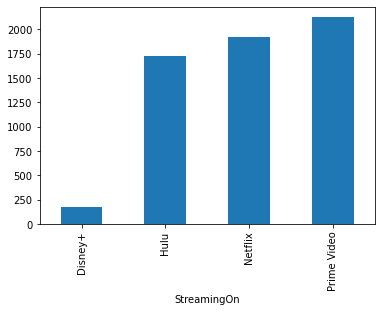

In [28]:
tv_shows_both_ratings = tv_shows_combined[(tv_shows_combined.IMDb > 0) & tv_shows_combined['Rotten Tomatoes'] > 0]
tv_shows_combined.groupby('StreamingOn').Title.count().plot(kind='bar')

In [29]:
figure = []
figure.append(px.violin(tv_shows_both_ratings, x = 'StreamingOn', y = 'IMDb', color='StreamingOn'))
figure.append(px.violin(tv_shows_both_ratings, x = 'StreamingOn', y = 'Rotten Tomatoes', color='StreamingOn'))
fig = make_subplots(rows=2, cols=4, shared_yaxes=True)

In [31]:
for i in range(2):
    for j in range(4):
        fig.add_trace(figure[i]['data'][j], row=i+1, col=j+1)

fig.update_layout(autosize=False, width=800, height=800)        
fig.show()

In [32]:
px.scatter(tv_shows_both_ratings, x='IMDb',
           y='Rotten Tomatoes',color='StreamingOn')